In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load sample data
data = pd.read_csv('car-sales.csv')

data


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [13]:
data.dropna()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [18]:
data.fillna(5, inplace = True)
data

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


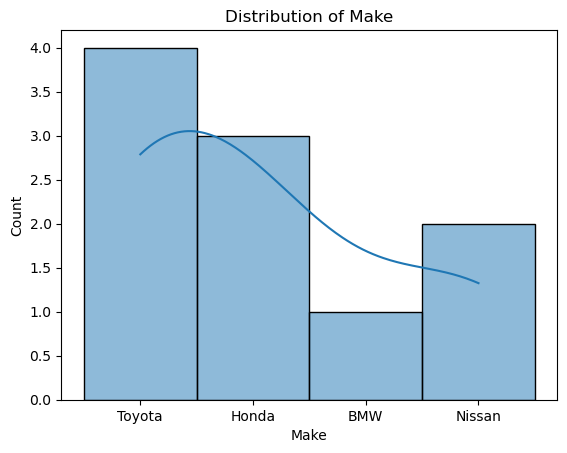

In [19]:
# Plot distribution of a column
sns.histplot(data['Make'], kde=True)
plt.title('Distribution of Make')
plt.show()

In [8]:
data = pd.DataFrame({'numbers': ['10', '20', '30', '40']})
data

,numbers
0,10
1,20
2,30
3,40


C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


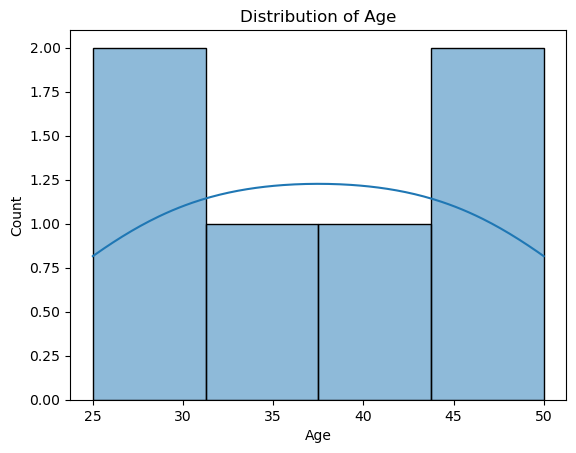

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load sample data
data = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5, 6, 7],
    'Age': [25, 30, 35, 40, None, 45, 50],
    'Income': [50000, 60000, None, 70000, 80000, 90000, 100000],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male'],
    'Occupation': ['Engineer', 'Scientist', 'Engineer', 'Artist', 'Engineer', 'Scientist', 'Scientist'],
    'Score': [70, 80, 90, 85, 75, None, 95],
    'Target': [1, 0, 1, 0, 1, 0, 1]
})

# Plot distribution of the 'Age' column
sns.histplot(data['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()


In [21]:
# Fill missing values with the mean for numerical columns
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Income'].fillna(data['Income'].mean(), inplace=True)
data['Score'].fillna(data['Score'].mean(), inplace=True)

# Fill missing values with the mode for categorical columns (if any)
# data['Occupation'].fillna(data['Occupation'].mode()[0], inplace=True)


In [22]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
scaler = StandardScaler()
data[['Age', 'Income', 'Score']] = scaler.fit_transform(data[['Age', 'Income', 'Score']])


In [23]:
# Example: Removing outliers based on Z-score for 'Income'
from scipy.stats import zscore

data = data[(zscore(data['Income']) < 3)]


In [24]:
import statsmodels.api as sm

# Fit a linear regression model
X = data[['Age', 'Income', 'Score']]
y = data['Target']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                 -0.206
Method:                 Least Squares   F-statistic:                    0.6578
Date:                Tue, 09 Jul 2024   Prob (F-statistic):              0.630
Time:                        13:39:49   Log-Likelihood:                -3.2392
No. Observations:                   7   AIC:                             14.48
Df Residuals:                       3   BIC:                             14.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5714      0.222      2.575      0.0

C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


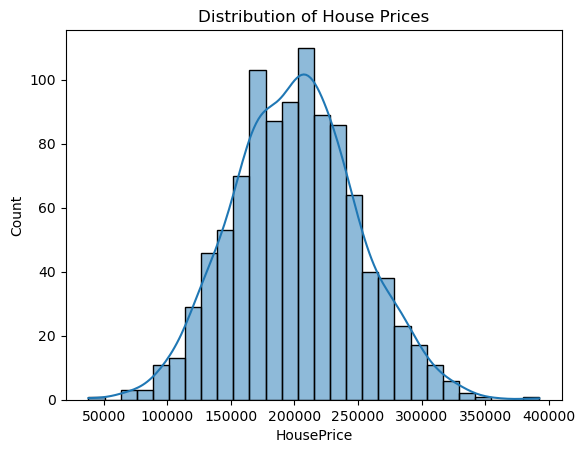

Mean Squared Error: 2389728503.279516


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data for house prices
np.random.seed(42)
house_prices = np.random.normal(loc=200000, scale=50000, size=1000)
size = np.random.normal(loc=2000, scale=500, size=1000)
location_quality = np.random.normal(loc=5, scale=2, size=1000)

# Create DataFrame
data = pd.DataFrame({
    'HousePrice': house_prices,
    'Size': size,
    'LocationQuality': location_quality
})

# Visualize distribution
sns.histplot(data['HousePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

# Standardize features
scaler = StandardScaler()
data[['Size', 'LocationQuality']] = scaler.fit_transform(data[['Size', 'LocationQuality']])

# Train a linear regression model
X = data[['Size', 'LocationQuality']]
y = data['HousePrice']
model = LinearRegression()
model.fit(X, y)

# Predict and evaluate
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')


C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


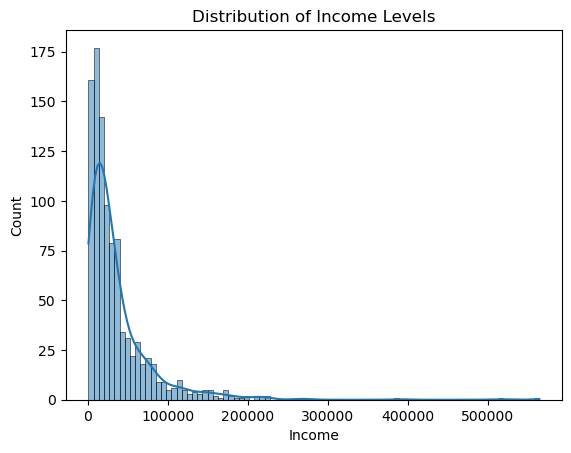

C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


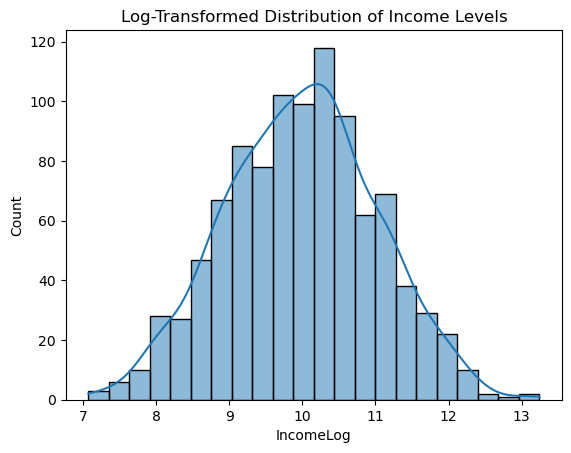

In [26]:
# Generate synthetic data for income levels
income = np.random.lognormal(mean=10, sigma=1, size=1000)

# Create DataFrame
data = pd.DataFrame({'Income': income})

# Visualize distribution
sns.histplot(data['Income'], kde=True)
plt.title('Distribution of Income Levels')
plt.show()

# Log transformation to normalize
data['IncomeLog'] = np.log(data['Income'])

# Visualize transformed distribution
sns.histplot(data['IncomeLog'], kde=True)
plt.title('Log-Transformed Distribution of Income Levels')
plt.show()


C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


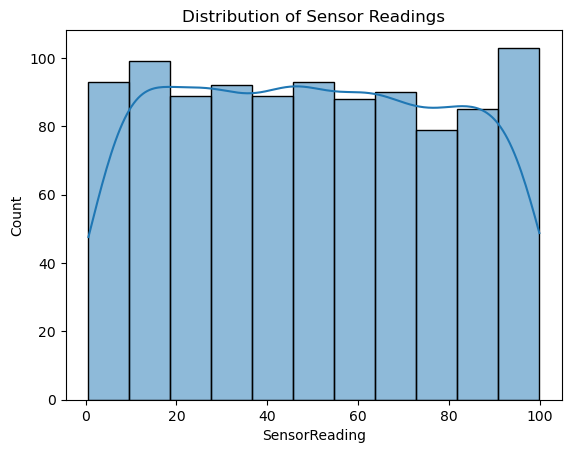

In [27]:
# Generate synthetic data for sensor readings
sensor_readings = np.random.uniform(low=0, high=100, size=1000)

# Create DataFrame
data = pd.DataFrame({'SensorReading': sensor_readings})

# Visualize distribution
sns.histplot(data['SensorReading'], kde=True)
plt.title('Distribution of Sensor Readings')
plt.show()


C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


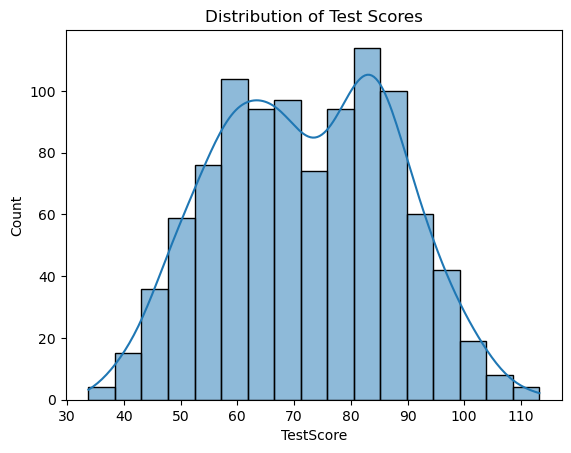

In [28]:
# Generate synthetic data for test scores
scores_group1 = np.random.normal(loc=60, scale=10, size=500)
scores_group2 = np.random.normal(loc=85, scale=10, size=500)
test_scores = np.concatenate([scores_group1, scores_group2])

# Create DataFrame
data = pd.DataFrame({'TestScore': test_scores})

# Visualize distribution
sns.histplot(data['TestScore'], kde=True)
plt.title('Distribution of Test Scores')
plt.show()


C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


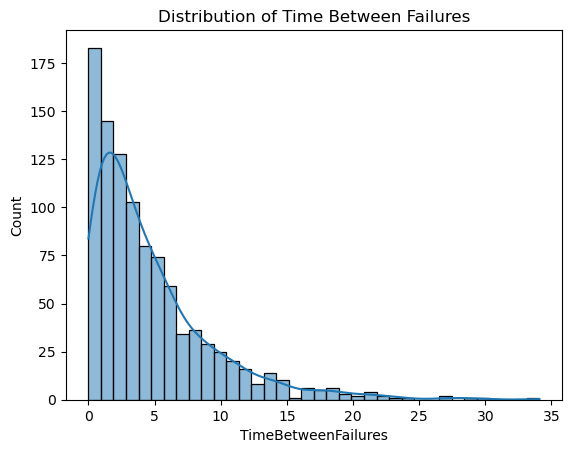

In [29]:
# Generate synthetic data for time between failures
time_between_failures = np.random.exponential(scale=5, size=1000)

# Create DataFrame
data = pd.DataFrame({'TimeBetweenFailures': time_between_failures})

# Visualize distribution
sns.histplot(data['TimeBetweenFailures'], kde=True)
plt.title('Distribution of Time Between Failures')
plt.show()
